In [2]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shortest_path import ShortestPath

/home/rdave/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
address_list1 = [
    "1000 Olin Way, Needham, MA",
    "958 Highland Ave, Needham, MA",
    "Medford, MA",
]

address_list2 = [
    '320 D St, Boston, MA',
    '11 Dorchester St, Boston, MA'
]

address_list = address_list1

# Create ShortestPath object and initialize graph
alg = ShortestPath(address_list, 1000)
start = address_list[0]
end = address_list[1]

start_id = alg.nearest_node(start)
end_id = alg.nearest_node(end)

Converting addresses...
Adding '1000 Olin Way, Needham, MA' to dictionary.
Adding '958 Highland Ave, Needham, MA' to dictionary.
Adding 'Medford, MA' to dictionary.
Creating graph...
MultiDiGraph with 87 nodes and 223 edges
Graph created & setup complete.


In [5]:
# Find max flow from start to end and add flow to graph attributes
max_flow, flowDict = alg.max_flow_path(start, end)
actual_flow = ox.graph_to_gdfs(alg.graph, nodes=False)['actual_flow'].fillna(0)
nx.set_edge_attributes(alg.graph, actual_flow, 'actual_flow')
print("Max flow possible: ", max_flow)

Max flow possible:  1900.0


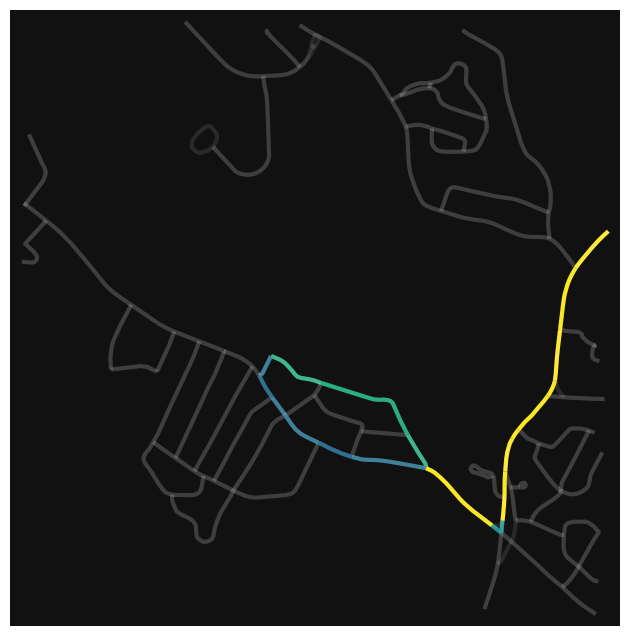

In [6]:
import pandas as pd
import matplotlib

# Map actual flow to color gradient
colors = ox.plot.get_edge_colors_by_attr(alg.graph, attr="actual_flow", cmap="viridis")

edge_has_flow = []

# Create list of 0/1 representing if that edge has flow or not
for u, v, ind in alg.graph.edges:
    if alg.graph[u][v][ind]['actual_flow'] == 0.0:
        edge_has_flow.append(1)
    else:
        edge_has_flow.append(0)

# Edit color so that 0.0 flow maps to translucent white, not the purple from viridis's 0
for index, value in colors.items():
    if edge_has_flow[0] == 1:
        colors[index] = (1, 1, 1, 0.1)
    edge_has_flow.pop(0)

# Plot max flow path with color gradient and save image
fig, ax = ox.plot_graph(alg.graph, node_size=0, edge_linewidth =3, edge_color=colors)
fig.colorbar(matplotlib.cm.ScalarMappable(cmap="viridis"), ax=ax)
fig.savefig("MaxFlow.png")

Max Flow Dijkstra (Time):  700.0


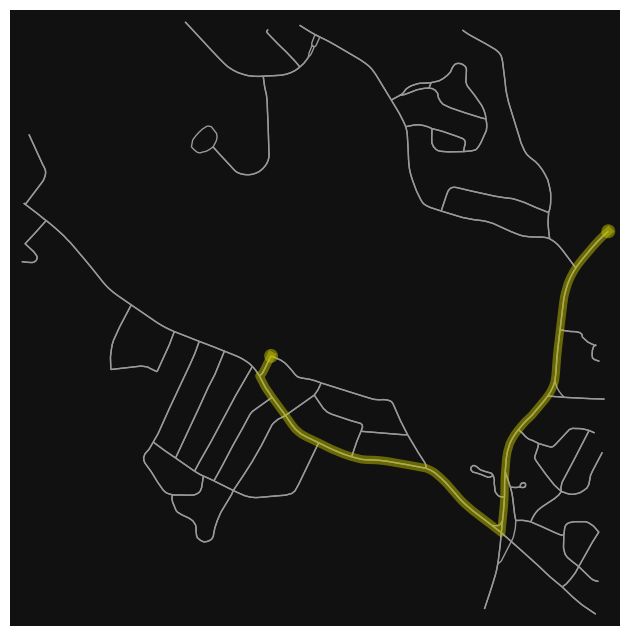

In [7]:
# OSMnx Dijkstra's by Travel Time
dijkstra_shortest_path_list_time = alg.d_shortest_path(address_list[0], address_list[1], weight="travel_time")

# Max flow for shortest path is the bottleneck capacity
max_flow_djkstra = 1900
for u, v, ind in alg.graph.edges:
    if alg.graph[u][v][ind]["actual_flow"] > 0.00:
        if alg.graph[u][v][ind]["actual_flow"] < max_flow_djkstra:
            max_flow_djkstra = alg.graph[u][v][ind]["actual_flow"]
print("Max Flow Dijkstra (Time): ", max_flow_djkstra)

fig, ax = ox.plot_graph_route(alg.graph, dijkstra_shortest_path_list_time, route_color="y", route_linewidth=6, node_size=0)

Max Flow Dijkstra (Distance):  700.0


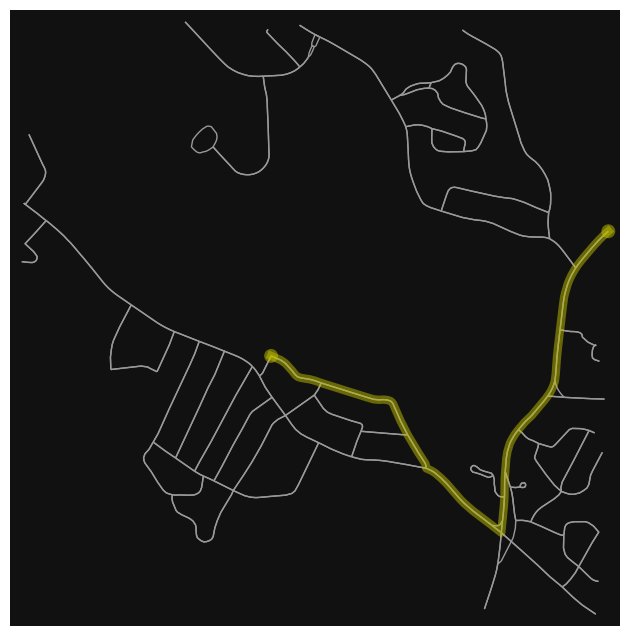

In [8]:
# OSMnx Dijkstra's by Distance
dijkstra_shortest_path_list_distance = alg.d_shortest_path(address_list[0], address_list[1], weight="length")

# Max flow for shortest path is the bottleneck capacity
max_flow_djkstra = 1900
for u, v, ind in alg.graph.edges:
    if alg.graph[u][v][ind]["actual_flow"] > 0.00:
        if alg.graph[u][v][ind]["actual_flow"] < max_flow_djkstra:
            max_flow_djkstra = alg.graph[u][v][ind]["actual_flow"]
print("Max Flow Dijkstra (Distance): ", max_flow_djkstra)

fig, ax = ox.plot_graph_route(alg.graph, dijkstra_shortest_path_list_distance, route_color="y", route_linewidth=6, node_size=0)

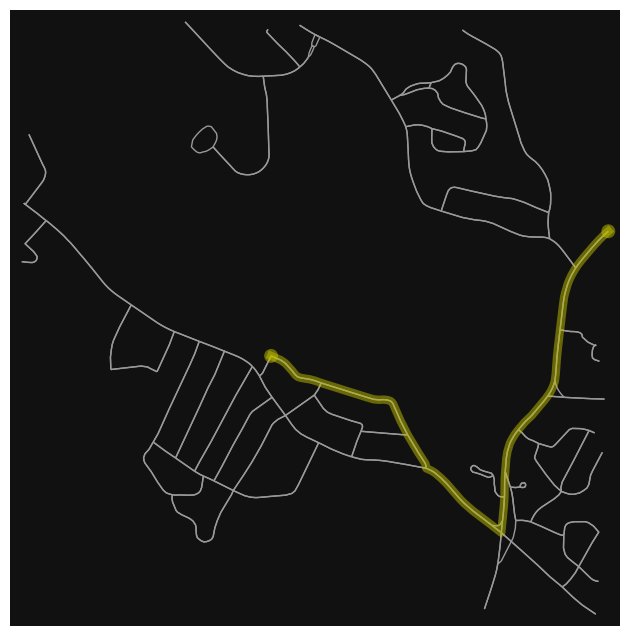

In [10]:
#* NX A* no heuristic = dijkstra's
astar_shortest_path_list = alg.astar_shortest_path(address_list[0], address_list[1], weight="travel_time")

fig, ax = ox.plot_graph_route(alg.graph, astar_shortest_path_list, route_color="y", route_linewidth=6, node_size=0)

In [2]:
# NX Dijkstra's
start_node = alg.nearest_node(address_list[0])
end_node = alg.nearest_node(address_list[1])
print(start_node)
print(end_node)
d_nx_shortest_path_list = nx.dijkstra_path(alg.graph, start_node[0], end_node[0])
print(d_nx_shortest_path_list)
fig, ax = ox.plot_graph_route(alg.graph, d_nx_shortest_path_list, route_color="y", route_linewidth=6, node_size=0)

NameError: name 'alg' is not defined